# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_study_df=pd.merge(study_results,mouse_metadata,on="Mouse ID",how="left")

# Display the data table for preview
mouse_study_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [3]:
# Checking the number of mice.
mice_number=mouse_study_df["Mouse ID"].nunique()
mice_number

249

In [4]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_miceID = mouse_study_df[mouse_study_df.duplicated(subset=['Mouse ID', 'Timepoint'])]['Mouse ID'].unique()
duplicate_miceID

array(['g989'], dtype=object)

In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse_data = mouse_study_df[mouse_study_df['Mouse ID'].isin(duplicate_miceID)]
duplicate_mouse_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_duplicate_df=mouse_study_df.drop_duplicates(subset=["Mouse ID","Timepoint"], keep='first')
clean_duplicate_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [59]:
# Checking the number of mice in the clean DataFrame.
mice_number_clean_df=clean_duplicate_df["Mouse ID"].nunique()
mice_number_clean_df

249

## Summary Statistics

In [69]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
summary_statistics = clean_duplicate_df.groupby('Drug Regimen')['Tumor Volume (mm3)']
mean_TuVol=summary_statistics.mean()
median_TuVol=summary_statistics.median()
tumor_vol_var=summary_statistics.var()
tumor_vol_std_dev=summary_statistics.std()
tumor_vol_std_Err=summary_statistics.sem()

 #Assemble the resulting series into a single summary DataFrame.
summary_statistics_df = pd.DataFrame({
    "Mean Tumor Volume": mean_TuVol,
    "Median Tumor Volume": median_TuVol,
    "Tumor Volume Variance": tumor_vol_var,
    "Tumor Volume Std.Dev": tumor_vol_std_dev,
    "Tumor Volume Std.Err": tumor_vol_std_Err
})
summary_statistics_df


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std.Dev,Tumor Volume Std.Err
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [71]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_statistics = clean_duplicate_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(
    mean=('mean'),
    median=('median'),
    var=('var'),
    std=('std'),
    sem=('sem')
)

summary_statistics_df_agg = pd.DataFrame(summary_statistics)
summary_statistics_df_agg

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

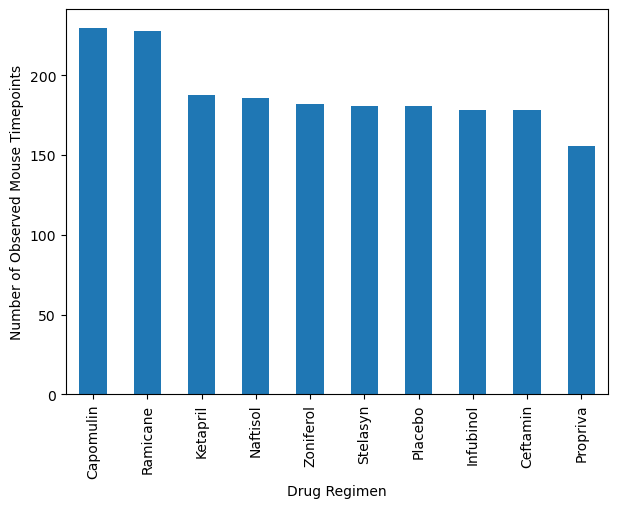

In [103]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
total_numer_rows = clean_duplicate_df['Drug Regimen'].value_counts()
total_numer_rows.plot(kind='bar', figsize=(7, 5))
plt.ylabel("Number of Observed Mouse Timepoints")
plt.xlabel("Drug Regimen")
plt.show()



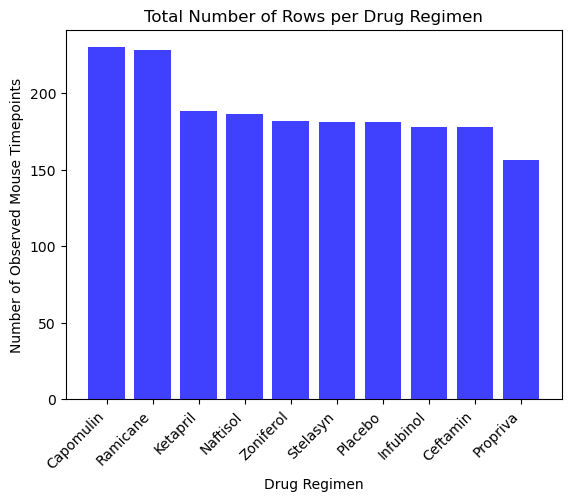

In [12]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
total_numer_rows=clean_duplicate_df['Drug Regimen'].value_counts()
#Extract data
x_axis = total_numer_rows.index
y_axis = total_numer_rows.values


#Create Bar
plt.bar(x_axis, y_axis, color='b',alpha=0.75,align="center")
plt.xticks(rotation=45, ha='right')
#Labels and Titles
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Observed Mouse Timepoints")
plt.title("Total Number of Rows per Drug Regimen")
plt.xticks(rotation=45, ha='right')

plt.show()


<function matplotlib.pyplot.show(close=None, block=None)>

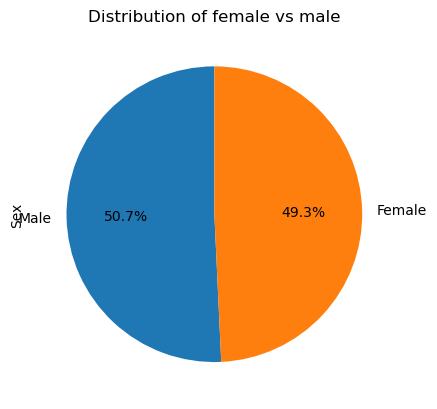

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex_mouse=clean_duplicate_df['Sex'].value_counts()

#Create a pie chart
sex_mouse.plot.pie(autopct='%1.1f%%', startangle=90)

#Add Title
plt.title('Distribution of female vs male')

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

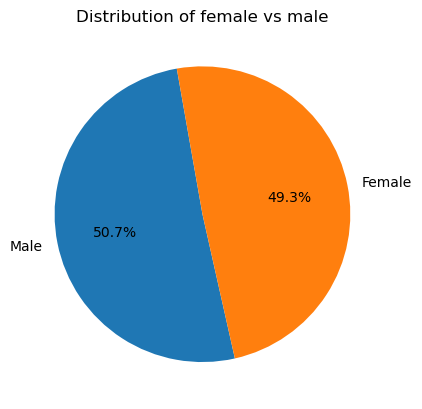

In [25]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex_mouse=clean_duplicate_df['Sex'].value_counts()
#Extract data
values = sex_mouse.values
labels = sex_mouse.index
#Create a pie chart
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=100)
#Add Title
plt.title('Distribution of female vs male')

plt.show


## Quartiles, Outliers and Boxplots

In [33]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
treatment_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
filtered_df = clean_duplicate_df[clean_duplicate_df['Drug Regimen'].isin(treatment_regimens)]

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = clean_duplicate_df.groupby('Mouse ID')['Timepoint'].max()
last_timepoint_df=pd.DataFrame(last_timepoint)

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merge_group=pd.merge(last_timepoint_df, clean_duplicate_df, on=['Mouse ID','Timepoint'])
merge_group

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
244,z435,10,48.710661,0,Propriva,Female,12,26
245,z578,45,30.638696,0,Ramicane,Male,11,16
246,z581,45,62.754451,3,Infubinol,Female,24,25
247,z795,45,65.741070,3,Naftisol,Female,13,29


In [40]:
# Put treatments into a list for for loop (and later for plot labels
treatments= ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data=[]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
for treatment in treatments:
    tumor_volumes = merge_group.loc[merge_group['Drug Regimen'] == treatment, 'Tumor Volume (mm3)']
    
    # add subset 
    tumor_vol_data.append(tumor_volumes)
    
    # Determine outliers using upper and lower bounds
    quartiles = tumor_volumes.quantile([0.25, 0.5, 0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)
    outliers = tumor_volumes.loc[(tumor_volumes < lower_bound) | (tumor_volumes > upper_bound)]
    
    print(f"{treatment}'s potential outliers: {outliers}")

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


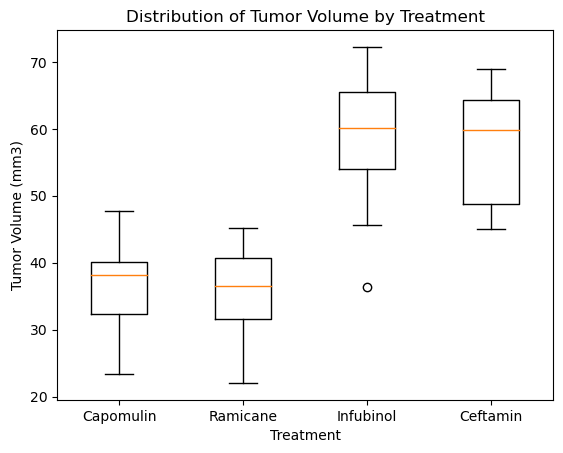

In [42]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.boxplot(tumor_vol_data,labels=treatments)
plt.xlabel('Treatment')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Distribution of Tumor Volume by Treatment')
plt.show()

## Line and Scatter Plots

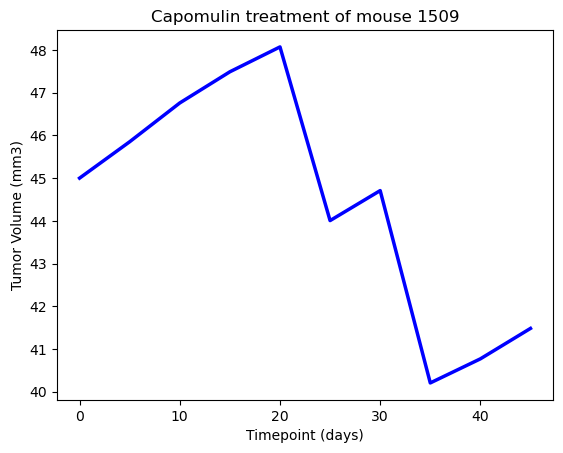

In [81]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
Capomulin = clean_duplicate_df.loc[clean_duplicate_df["Drug Regimen"] == "Capomulin", :]
line_plot = Capomulin.loc[Capomulin["Mouse ID"] == "l509",:]
x_axis = line_plot["Timepoint"]
tumor_volume = line_plot["Tumor Volume (mm3)"]

# Create figure and axes
fig, ax = plt.subplots()

# Create a line plot
plt.plot(x_axis, tumor_volume, linewidth=2.5,color="blue")

#Set labels and title
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin treatment of mouse 1509")
plt.show()


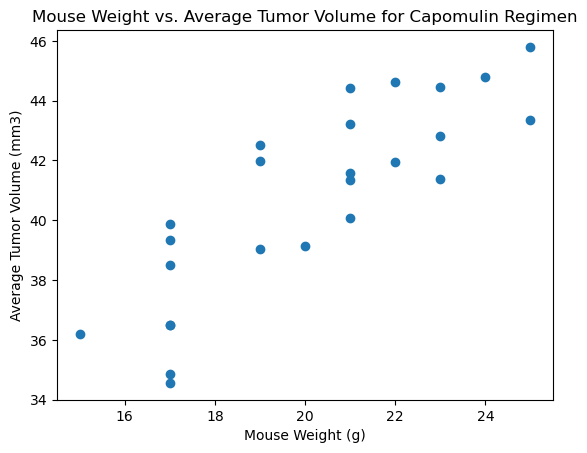

In [94]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
Capomulin = clean_duplicate_df.loc[clean_duplicate_df["Drug Regimen"] == "Capomulin", :]
average_tumor=Capomulin.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()
mouse_weight=Capomulin.groupby("Mouse ID")["Weight (g)"].mean()
plt.scatter(mouse_weight, average_tumor)
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Mouse Weight vs. Average Tumor Volume for Capomulin Regimen')
plt.show() 


## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


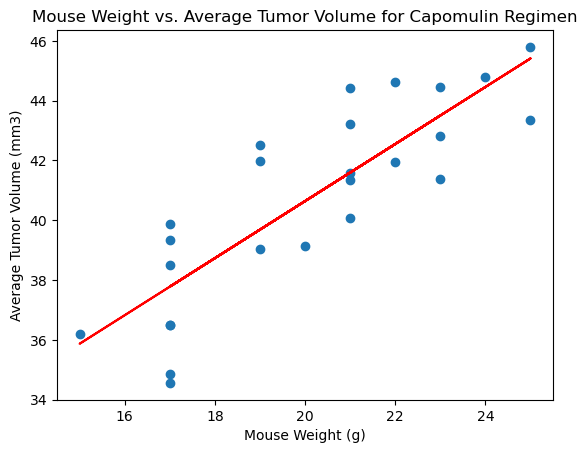

In [100]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
correlation_coefficient = round(st.pearsonr(mouse_weight, average_tumor)[0], 2)
print(f"The correlation between mouse weight and the average tumor volume is {correlation_coefficient}")
slope, intercept, r_value, p_value, std_err = st.linregress(mouse_weight, average_tumor)
plt.scatter(mouse_weight, average_tumor)
plt.plot(mouse_weight, slope * mouse_weight + intercept, color='red')
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Mouse Weight vs. Average Tumor Volume for Capomulin Regimen')
equation = f"y = {slope:.2f}x + {intercept:.2f}"
corr_text = f"Correlation coefficient: {correlation_coefficient:.2f}"
plt.show()